# AdaBoost

Boosting often considers homogeneous weak learners, learns them sequentially in a very adaptative way (a base model depends on the previous ones) and combines them following a deterministic strategy.

Boosting is a form of sequential learning technique. The algorithm works by training a model with the entire training set, and subsequent models are constructed by fitting the residual error values of the initial model. In this way, Boosting attempts to give higher weight to those observations that were poorly estimated by the previous model. Once the sequence of the models are created the predictions made by models are weighted by their accuracy scores and the results are combined to create a final estimation. Models that are typically used in Boosting technique are XGBoost (Extreme Gradient Boosting), GBM (Gradient Boosting Machine), ADABoost (Adaptive Boosting), etc.

Boosting is a general ensemble method that creates a strong classifier from a number of weak classifiers.

This is done by building a model from the training data, then creating a second model that attempts to correct the errors from the first model. Models are added until the training set is predicted perfectly or a maximum number of models are added.

AdaBoost was the first really successful boosting algorithm developed for binary classification. It is the best starting point for understanding boosting.

# AdaBoost Ensemble

Weak models are added sequentially, trained using the weighted training data.

The process continues until a pre-set number of weak learners have been created (a user parameter) or no further improvement can be made on the training dataset.

Once completed, you are left with a pool of weak learners each with a stage value.

# AdaBoost through Python

In [2]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib as plt
%matplotlib inline

col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv('datasets/pima-indians-diabetes.data.csv', header=None, names=col_names)
print(pima.head())

#split dataset in features and target variable
Predictors = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
TargetVariable='label'
X = pima[Predictors] # Features
y = pima.label # Target variable

# Import train_test_split function
from sklearn.model_selection import train_test_split 

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 
# 70% training and 30% test

   pregnant  glucose  bp  skin  insulin   bmi  pedigree  age  label
0         6      148  72    35        0  33.6     0.627   50      1
1         1       85  66    29        0  26.6     0.351   31      0
2         8      183  64     0        0  23.3     0.672   32      1
3         1       89  66    23       94  28.1     0.167   21      0
4         0      137  40    35      168  43.1     2.288   33      1


In [3]:
# Adaboost 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Choosing Decision Tree with 1 level as the weak learner
DTC=DecisionTreeClassifier(max_depth=1)
clf = AdaBoostClassifier(n_estimators=50, base_estimator=DTC ,learning_rate=1)

# Printing all the parameters of Adaboost
print(clf)


AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                             

In [7]:
# Creating the model on Training Data
AB = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = AB.predict(X_test)

In [8]:
# Measuring accuracy on Testing Data
from sklearn import metrics

print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       146
           1       0.75      0.60      0.67        85

    accuracy                           0.78       231
   macro avg       0.77      0.74      0.75       231
weighted avg       0.78      0.78      0.77       231

[[129  17]
 [ 34  51]]


In [9]:
# Printing the Overall Accuracy of the model
print("Accuracy of the model : {0:0.3f}".format(metrics.accuracy_score(y_test, y_pred)))

Accuracy of the model : 0.779


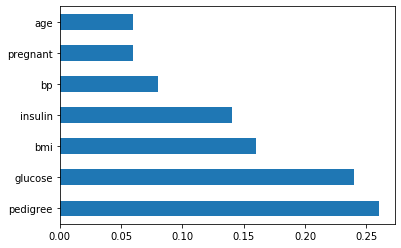

In [10]:
# Plotting the feature importance for Top 10 most important columns
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

In [12]:
# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults['TargetColumn']=y_test
TestingDataResults['Predicted'+ TargetVariable]=y_pred
TestingDataResults.head()

,pregnant,insulin,bmi,age,glucose,bp,pedigree,TargetColumn,Predictedlabel
285,7,135,26.0,51,136,74,0.647,0,0
101,1,0,26.1,22,151,60,0.179,0,0
581,6,0,25.0,27,109,60,0.206,0,0
352,3,0,34.4,46,61,82,0.243,0,0
726,1,180,36.1,25,116,78,0.496,0,0


### Plotting one of the Decision trees from Adaboost

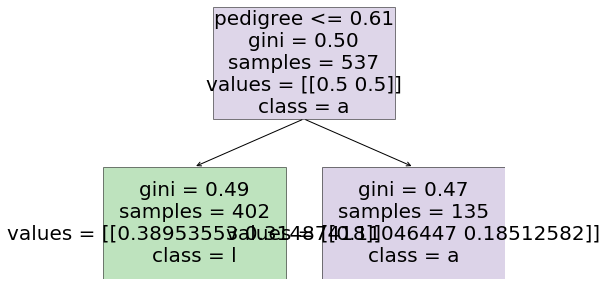

In [13]:
# PLotting 5th single Decision Tree from Adaboost
from dtreeplt import dtreeplt
dtree = dtreeplt(model=clf.estimators_[5], feature_names=Predictors, target_names=TargetVariable)
fig = dtree.view()

# Refrence:
* https://machinelearningmastery.com/boosting-and-adaboost-for-machine-learning/
* https://towardsdatascience.com/understanding-adaboost-2f94f22d5bfe